### Project:- Gender Classification using Deep Learning and computer vision (cv2)

Face detection has become a very interesting problem in image processing and computer vision. In this Project, we are going to build computer vision project on Gender Detection with Convolution Neural Network

importing libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [10]:
import pandas as pd


load image file from dataset

In [28]:
image_files = [f for f in glob.glob(r'gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]

In [33]:
# data_path = 'gender_dataset_face'

In [34]:
# categories = os.listdir(data_path)

In [35]:
# labels = [ i for i in range(len(categories))]
# label_dict = dict(zip(categories, labels))

In [36]:
# label_dict

In [37]:
# categories

Now we are creating a function which converts images into an array

In [38]:
# image_size = 100
# data = []
# target =[]

# for category in categories:
#     image_path = os.path.join(data_path, category)
#     img_names = os.listdir(image_path)
    
#     for img_name in img_names:
#         img_path = os.path.join(data_path,img_name)
#         img= cv2.imread(img_path)
        
#         try:
#             resized = cv2.resize(img, (image_size,image_size))
#             data.append(resized)
#             target.append([category])
#         except Exception as e:
#             print('Exception:', e)
    

shuffling the data

In [39]:
image_files[:5]

['gender_dataset_face\\man\\face_0.jpg',
 'gender_dataset_face\\man\\face_1.jpg',
 'gender_dataset_face\\man\\face_10.jpg',
 'gender_dataset_face\\man\\face_1000.jpg',
 'gender_dataset_face\\man\\face_1001.jpg']

In [40]:
random.shuffle(image_files)

In [41]:
image_files[:5]

['gender_dataset_face\\woman\\face_48.jpg',
 'gender_dataset_face\\woman\\face_643.jpg',
 'gender_dataset_face\\man\\face_131.jpg',
 'gender_dataset_face\\woman\\face_1274.jpg',
 'gender_dataset_face\\woman\\face_107.jpg']

#### Converting images to arrays and labelling the categories

In [43]:
# initial parameters
epochs= 100
lr= 1e-3
batch_size = 64
img_dims =(96,96,3)
data=[]
labels=[]

In [44]:
for img in image_files:
    
    image= cv2.imread(img)
#     print(image[0])
    image = cv2.resize(image, (img_dims[0], img_dims[1]))
    image= img_to_array(image)
    data.append(image)
    
    label=img.split(os.path.sep)[-2]
    if label == 'woman':
        label =1
    else:
        label =0
    labels.append([label])  

#### Data Preprocessing

converting data (images array) into numpy array and scaling it 

In [45]:
data = np.array(data, dtype = 'float' ) /255.0
labels = np.array(labels)

In [46]:
type(data)

numpy.ndarray

#### Spliting data into traing and testing set

In [47]:
(X_train,X_test,y_train,y_test)= train_test_split(data, labels, test_size =0.2, random_state =42)

In [48]:
X_train.shape, X_test.shape

((1180, 96, 96, 3), (295, 96, 96, 3))

In [49]:
y_train

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [56]:
y_train = to_categorical(y_train, num_classes =2)
y_test = to_categorical(y_test, num_classes =2)

In [57]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [58]:
#agumenting dataset
aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.1,
                  height_shift_range=0.1, shear_range = 0.2, zoom_range = 0.2,
                        horizontal_flip= True, fill_mode ='nearest')

### Model Building

#### Convolution Neural Network

In [107]:
#define model
def build(width,height,depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format == 'channels_first':
        inputShape = (depth, height, weight)
        chanDim = 1
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu")) 
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model
    


In [108]:
#build Model
model = build(width= img_dims[0], height= img_dims[1], depth = img_dims[2],
             classes=2)

In [109]:
model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics =['accuracy'])

In [110]:
model.fit(X_train, y_train, epochs= 20
          
          , batch_size =batch_size)

Epoch 1/20
19/19 [==============================] - 51s 3s/step - loss: 0.9232 - accuracy: 0.6788
Epoch 2/20
19/19 [==============================] - 49s 3s/step - loss: 0.4584 - accuracy: 0.8641
Epoch 3/20
19/19 [==============================] - 49s 3s/step - loss: 0.2562 - accuracy: 0.9264
Epoch 4/20
19/19 [==============================] - 49s 3s/step - loss: 0.1560 - accuracy: 0.9535
Epoch 5/20
19/19 [==============================] - 50s 3s/step - loss: 0.1102 - accuracy: 0.9718
Epoch 6/20
19/19 [==============================] - 50s 3s/step - loss: 0.0879 - accuracy: 0.9777
Epoch 7/20
19/19 [==============================] - 51s 3s/step - loss: 0.0625 - accuracy: 0.9860
Epoch 8/20
19/19 [==============================] - 50s 3s/step - loss: 0.0491 - accuracy: 0.9853
Epoch 9/20
19/19 [==============================] - 54s 3s/step - loss: 0.0403 - accuracy: 0.9860
Epoch 10/20
19/19 [==============================] - 50s 3s/step - loss: 0.0465 - accuracy: 0.9857
Epoch 11/20
19/19 [

In [108]:
# model.evaluate(X_train,y_train)

In [109]:
# model.evaluate(X_test, y_test)

#### Predictions on test data 

In [188]:
img_=X_test[0]

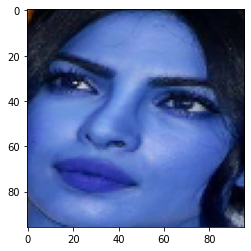

In [189]:
plt.imshow(img_)

In [190]:
predictions=model.predict(X_test)[0]
idx=np.argmax(predictions)

In [191]:
classes = ['Male','Female']
print(classes[idx])

Female


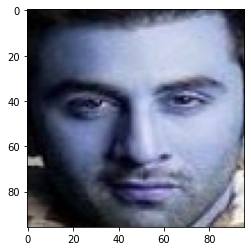

In [192]:
img_=X_test[5]
plt.imshow(img_)

In [194]:
predictions=model.predict(X_test)[5]
idx=np.argmax(predictions)
print(classes[idx])

Male


In [ ]:
images

In [4]:
import cvlib as cv

In [128]:
# face, confidence = cv.detect_face(img_)

In [129]:
img1=image_files[0]

### Predictions on New images

In [30]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [68]:
                   
# load model
model = load_model('gender_detection.model')

In [82]:
path= './gender_dataset_face/woman/woman1.jpg'

In [83]:
classes = ['Male','Female']

In [84]:
img= cv2.imread(path)

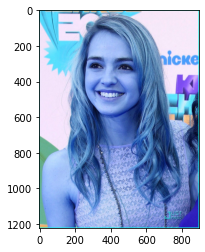

In [85]:
plt.imshow(img)

importing cvlib for face detection

In [3]:
import cvlib as cv

In [87]:
face, confidence=cv.detect_face(img)

In [88]:
face

[[256, 122, 583, 584]]

now draw reactangle over image 

In [89]:
for idx, f in enumerate(face):

    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 3)


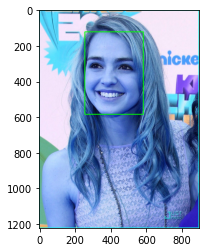

In [90]:
plt.imshow(img)

crop face area and apply it for our model for predictions

In [96]:
face_crop = np.copy(img[startY:endY, startX:endX]) 

#Image preprocessing 
face_crop = cv2.resize(face_crop, (96,96))
face_crop = face_crop.astype('float')/ 255.0
face_crop = img_to_array(face_crop)
face_crop = np.expand_dims(face_crop, axis = 0)
conf = model.predict(face_crop)[0] 


idx = np.argmax(conf)
label = classes[idx]

In [92]:
print(label)

Female


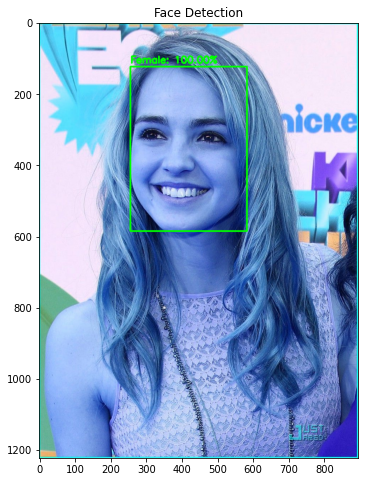

In [94]:
Y = startY - 10 if startY -10 > 10 else startY +1
label = '{}: {:.2f}%'.format(label, conf[idx] * 100)

cv2.putText(img, label , (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
           0.9, (0, 255, 0), 3)
plt.figure(figsize=(12,8))
plt.title("Face Detection")
plt.imshow(img)

let's try it on another image

In [100]:
path= './gender_dataset_face/man/elon.jpg'

In [104]:
img= cv2.imread(path)
face, confidence=cv.detect_face(img)
for idx, f in enumerate(face):

    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 3)
    face_crop = np.copy(img[startY:endY, startX:endX]) 

    #Image preprocessing 
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype('float')/ 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis = 0)
    conf = model.predict(face_crop)[0] 


    idx = np.argmax(conf)
    label = classes[idx]

In [105]:
print(label)

Male


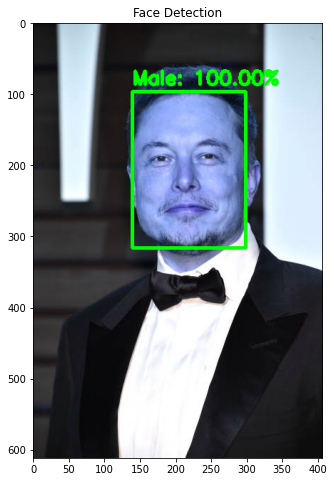

In [107]:
Y = startY - 10 if startY -10 > 10 else startY +1
label = '{}: {:.2f}%'.format(label, conf[idx] * 100)

cv2.putText(img, label , (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
           0.9, (0, 255, 0), 3)
plt.figure(figsize=(12,8))
plt.title("Face Detection")
plt.imshow(img)

## Thank You!!!